In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from astropy import units as U
from astropy import constants as const
from astropy.coordinates import SkyCoord
import astropy.units as U
import astropy 
from astropy.io import fits
import seaborn as sns

def load_fits(inFile):
    hdu_list = fits.open(inFile)
    data = hdu_list[0].data
    hdu_list.close()
    return data

In [2]:
observation_metadata = pd.read_csv('all_alma_data.csv')

/var/folders/66/76q50s015tq8wc5qz1pvg7y40000gn/T/ipykernel_16865/2648061968.py:1: DtypeWarning: Columns (35) have mixed types. Specify dtype option on import or set low_memory=False.
  observation_metadata = pd.read_csv('all_alma_data.csv')


In [13]:
unique_obs = list(set(observation_metadata['scan_intent'].values))
print(unique_obs)
m_obs = [obs for obs in unique_obs if 'TARGET' in obs]
len(unique_obs)
print(unique_obs)

['APPPHASE_ACTIVE TARGET', 'AMPLI FLUX WVR', 'APPPHASE_ACTIVE WVR', nan, 'BANDPASS FLUX WVR', 'AMPLI WVR', 'AMPLI BANDPASS FLUX PHASE WVR', 'BANDPASS FLUX PHASE', 'BANDPASS PHASE WVR', 'CHECK PHASE WVR', 'PHASE', 'POLARIZATION WVR', 'FLUX PHASE WVR', 'AMPLI BANDPASS PHASE WVR', 'APPPHASE_ACTIVE BANDPASS WVR', 'BANDPASS DELAY PHASE WVR', 'FLUX POLARIZATION WVR', 'CHECK', 'BANDPASS POLARIZATION WVR', 'PHASE POLARIZATION WVR', 'BANDPASS DIFFGAIN FLUX PHASE WVR', 'APPPHASE_ACTIVE POLARIZATION WVR', 'TARGET WVR', 'CHECK WVR', 'DELAY PHASE WVR', 'AMPLI FLUX PHASE WVR', 'APPPHASE_ACTIVE BANDPASS POLARIZATION WVR', 'FLUX WVR', 'TARGET', 'BANDPASS PHASE', 'AMPLI DELAY PHASE', 'BANDPASS FLUX', 'PHASE TARGET WVR', 'FLUX', 'BANDPASS FLUX POLARIZATION WVR', 'AMPLI PHASE TARGET WVR', 'AMPLI FLUX', 'BANDPASS WVR', 'FLUX PHASE', 'BANDPASS FLUX PHASE WVR', 'APPPHASE_ACTIVE PHASE TARGET WVR', 'AMPLI BANDPASS FLUX WVR', 'BANDPASS', 'AMPLI DELAY PHASE WVR', 'APPPHASE_ACTIVE', 'BANDPASS CHECK FLUX WVR', 'D

TypeError: argument of type 'float' is not iterable

In [14]:
observation_metadata = pd.read_csv('all_alma_data.csv')
observation_metadata = observation_metadata[['s_resolution', 't_exptime', 'em_min', 't_resolution',
                        'em_max', 'em_resolution', 'spatial_resolution', 'bandwidth', 
                        'frequency', 'frequency_support', 'velocity_resolution', 'sensitivity_10kms', 
                        'cont_sensitivity_bandwidth', 'scan_intent', 's_ra', 's_dec']]
observation_metadata = observation_metadata.dropna()

scan_intents = observation_metadata['scan_intent'].values
ids = []
for i, scan in enumerate(scan_intents):
    if scan == 'TARGET':
        ids.append(i)
ids = np.array(ids)
print(scan_intents.shape, ids.shape)

observation_metadata = observation_metadata.iloc[ids, :]
observation_metadata = observation_metadata[(observation_metadata['s_resolution'] == observation_metadata['spatial_resolution'])]
observation_metadata = observation_metadata.drop(columns=['s_resolution'])     
observation_metadata = observation_metadata[['spatial_resolution', 't_exptime', 'em_min','em_max', 'em_resolution', 
            'bandwidth', 'frequency', 'frequency_support', 'velocity_resolution', 's_ra', 's_dec', 't_resolution']]
observation_metadata['velocity_resolution'] = observation_metadata['velocity_resolution'] * 10**(-3)

observation_metadata = observation_metadata.rename(columns={'spatial_resolution': 'spatial_resolution [arcsec]',
                                                            't_exptime': 'integration_time [s]',
                                                            'em_resolution': 'frequency_resolution [m]',
                                                            'bandwidth': 'bandwidth [MHz]',
                                                            'frequency': 'frequency [Ghz]',
                                                            'velocity_resolution': 'velocity_resolution [Km/s]',
                                                            'em_min': 'frequency_min [m]', 'em_max': 'frequency_max [m]',
                                                            's_ra': 'ra [deg]', 's_dec': 'dec [deg]'})
freq_sup = observation_metadata['frequency_support'].values
observation_metadata['bandwidth [MHz]'] = observation_metadata['bandwidth [MHz]'].values * 10**(-6)
freq_res = [int(float(f.split(',')[1][:-3]))* 10 ** (-3)  for f in freq_sup]
observation_metadata.info()

coords = SkyCoord(ra=observation_metadata['ra [deg]'], dec=observation_metadata['dec [deg]'], unit='deg').to_string('hmsdms')
b = 'J2000 '
coords = [b + i for i in coords]
observation_dist = observation_metadata[['spatial_resolution [arcsec]', 'integration_time [s]', 
                                        'velocity_resolution [Km/s]', 'ra [deg]', 'dec [deg]', 'bandwidth [MHz]']]
observation_dist['J2000 coordinates'] = coords
observation_dist['frequency_resolution [MHz]'] = freq_res
observation_dist.to_csv('obs_configurations.csv', index=False)



/var/folders/66/76q50s015tq8wc5qz1pvg7y40000gn/T/ipykernel_16865/1926066002.py:1: DtypeWarning: Columns (35) have mixed types. Specify dtype option on import or set low_memory=False.
  observation_metadata = pd.read_csv('all_alma_data.csv')


(81999,) (35574,)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 32887 entries, 4 to 81998
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   spatial_resolution [arcsec]  32887 non-null  float64
 1   integration_time [s]         32887 non-null  float64
 2   frequency_min [m]            32887 non-null  float64
 3   frequency_max [m]            32887 non-null  float64
 4   frequency_resolution [m]     32887 non-null  float64
 5   bandwidth [MHz]              32887 non-null  float64
 6   frequency [Ghz]              32887 non-null  float64
 7   frequency_support            32887 non-null  object 
 8   velocity_resolution [Km/s]   32887 non-null  float64
 9   ra [deg]                     32887 non-null  float64
 10  dec [deg]                    32887 non-null  float64
 11  t_resolution                 32887 non-null  float64
dtypes: float64(11), object(1)
memory usage: 3.3+ MB


/var/folders/66/76q50s015tq8wc5qz1pvg7y40000gn/T/ipykernel_16865/1926066002.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  observation_dist['J2000 coordinates'] = coords
/var/folders/66/76q50s015tq8wc5qz1pvg7y40000gn/T/ipykernel_16865/1926066002.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  observation_dist['frequency_resolution [MHz]'] = freq_res


In [ ]:
cfreq = observation_metadata['frequency [Ghz]'].values * 10**9 * U.Hz
wdelt  = observation_dist['velocity_resolution [Km/s]'].values * U.km / U.s
fdelt = observation_dist['frequency_resolution [MHz]'].values * 10**6 * U.Hz
bandwidth = observation_dist['bandwidth [MHz]'].values * 10**6 * U.Hz
zdelt = np.zeros(wdelt.shape) * U.km / U.s
print(cfreq.shape, wdelt.shape, fdelt.shape, zdelt.shape, bandwidth.shape)



In [ ]:
for i in range(len(wdelt[:10])):
    print(wdelt[i])
    print(fdelt[i])
    print(bandwidth[i])
    print(cfreq[i])
    print(zdelt[i])

In [ ]:
print(np.unique(bandwidth
                ))

In [ ]:
fdelt_tran = np.array([]
    np.abs(wdelt[i].to(U.Hz, equivalencies=U.doppler_radio(cfreq[i])) - zdelt[i].to(U.Hz, equivalencies=U.doppler_radio(cfreq[i])))
    for i in range(len(wdelt))
])



#fdelt_tran = np.abs(wdelt.to(U.Hz, equivalencies=U.doppler_radio(cfreq)) - zdelt.to(U.Hz, equivalencies=U.doppler_radio(cfreq)))

n_channels_1 = bandwidth / fdelt_tran
n_channels_2 = bandwidth / fdelt
n_channels_1 = n_channels_1.astype(int)
n_channels_2 = n_channels_2.astype(int)

print(n_channels_1[:10], n_channels_2[:10])


In [ ]:
np.unique(observation_dist['bandwidth [MHz]'])

In [ ]:
obs_params = pd.read_csv('obs_configurations.csv')
obs_params.info()

In [ ]:

plt.hist(freq_res)

In [ ]:
observation_dist['s_ra'].values[:10]

In [ ]:
c = const.c.to(U.km / U.s).value
print(c)
restfreq = 1.420405752
restvel = c * ((restfreq - observation_metadata['frequency [GHz]']) / restfreq)
observation_metadata['restvel'] = restvel

In [ ]:
sns.set_style('whitegrid')
sns.set_context('talk')
sns.set_palette('colorblind')


for column in observation_metadata.columns:
    fig, ax = plt.subplots(figsize=(5, 5))
    sns.histplot(x=column, data=observation_metadata, kde=False, ax=ax)
    plt.show()
    print(np.mean(observation_metadata[column]), np.std(observation_metadata[column]))


In [ ]:
obs_params = pd.read_csv('obs_configurations.csv')
freq_res = obs_params['frequency_resolution [MHz]'].values


(1, 64, 256, 256) (1, 64, 256, 256)


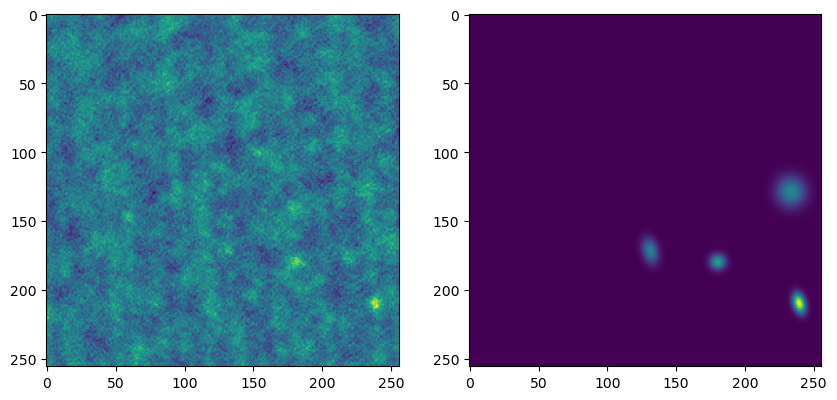

In [3]:
path = '/Users/michele/Documents/GitHub/ALMASim/sims/clean_cube_0.fits'
dpath = '/Users/michele/Documents/GitHub/ALMASim/sims/dirty_cube_0.fits'
dcube = load_fits(dpath)
cube = load_fits(path)
print(cube.shape, dcube.shape)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(dcube[0, 0, :, :])
ax[1].imshow(cube[0, 0, :, :])
plt.show()
